   Feature1  Feature2 Label
0  0.496714 -1.415371   Dog
1 -0.138264 -0.420645   Dog
2  0.647689 -0.342715   Cat
3  1.523030 -0.802277   Dog
4 -0.234153 -0.161286   Cat
Accuracy: 0.45


C:\Users\jjerl\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


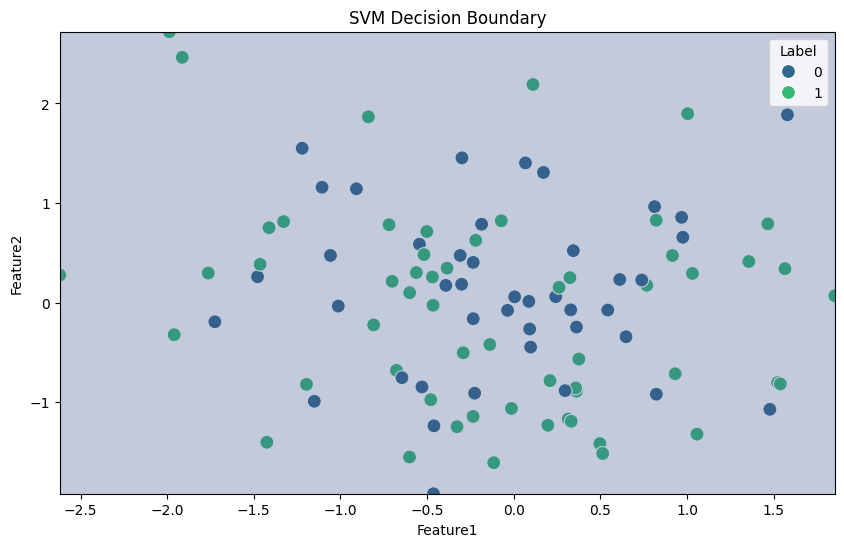

In [1]:
#Task 3: Cat vs Dog Classification I implemented a Support Vector Machine (SVM) classifier to classify images of cats and dogs using the TensorFlow Datasets (TFDS) Cats vs Dogs dataset.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(42)
data = {
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100),
    'Label': np.random.choice(['Cat', 'Dog'], 100)
}

df = pd.DataFrame(data)
print(df.head())

# Preprocess the dataset
df['Label'] = df['Label'].map({'Cat': 0, 'Dog': 1})

# Define the features (X) and the target variable (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Visualize the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='viridis', s=100)

# Create a mesh grid
xx, yy = np.meshgrid(np.linspace(X['Feature1'].min(), X['Feature1'].max(), 100),
                     np.linspace(X['Feature2'].min(), X['Feature2'].max(), 100))

# Plot decision boundary
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.title('SVM Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()